<a href="https://colab.research.google.com/github/Seaw24/Your-Dog-Breed/blob/main/Your_dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Your Dog Breed** (Computer vision, Pytorch)


## 1.Setup
- Import important libs
- Device agnostic
- Setup changable hyperparameter

###1.1 Important libs




In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import torchvision
from torchvision import datasets,transforms
import numpy as np

torch.__version__

'2.8.0+cu126'

### 1.2 Device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 1.3 Hyparameters

In [ ]:
RANDOM_SEED = 420

## 2.Loading images into the expected folder
 - Mounting data.zip from GG Drive
 - Unzip it
 - Untar the some file
 - Convert from mat data file to Images in folders has name of that Dog Breed and return all class name, and class to index dict

### 2.1 Mounting/ Loading data from google drive and walk through it

In [ ]:
import zipfile
from pathlib import Path
from google.colab import drive

# Setup the path to data folder

data_path = Path("data/")
raw_data_path = data_path/"raw_data"
image_path = data_path/"dog_images"

if not image_path.is_dir() or not raw_data_path.is_dir():

  if not image_path.is_dir():
    image_path.mkdir(parents = True,
                    exist_ok= True)

  if not raw_data_path.is_dir():

    print(f"Downloading..... ")

    # Download the dataset
    ## unzip and get the dataset as .mat file
    drive.mount('/content/drive')

    zip_path = "/content/drive/MyDrive/Colab Notebooks/data.zip"

    with zipfile.ZipFile(zip_path,"r") as zip_ref:
      print("Unzipping the dataset")
      zip_ref.extractall(raw_data_path)
      print("Completed unziping")

else:
  print(f"{image_path} and {raw_data_path} is already existed,\n >>>>>> Skipping download")




Downloading..... 
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unzipping the dataset
Completed unziping


In [ ]:
#Create more data path

## Cuz we zip file in data folder and put in raw_data_path PLEASE RECHECK
raw_data_path = raw_data_path/"data"

## images path
raw_data_images_path = raw_data_path/"Images"

In [ ]:
import shutil
from pathlib import Path
# Untar images, notes/tags:
# -x = extract files from the zipped file
# -v = verbose
# -z = decompress files
# -f = tell tar which file to deal with

if not raw_data_images_path.is_dir():
  !tar -xf data/raw_data/data/images.tar
  !tar -xf data/raw_data/data/annotation.tar
  !tar -xf data/raw_data/data/lists.tar


  !mv Images data/raw_data/data
  !mv Annotation data/raw_data/data
  !mv file_list.mat data/raw_data/data

  print("Completed Untaring")
else:
  print("Skipped untaring")

## You might want to move train_list and test_list.mat in if you haven't downloaded it



Completed Untaring


In [ ]:
import os

def walk_through_dir(dir_path):

  """ Walks through the directory and print its contents"""
  for dirpath,dirname, filename in os.walk(dir_path):
    print(f" There are {len(filename)} files and {len(dirname)} directories in the {dirpath} directory")

In [ ]:
walk_through_dir(raw_data_path)

 There are 6 files and 2 directories in the data/raw_data/data directory
 There are 0 files and 120 directories in the data/raw_data/data/Images directory
 There are 150 files and 0 directories in the data/raw_data/data/Images/n02106166-Border_collie directory
 There are 232 files and 0 directories in the data/raw_data/data/Images/n02092002-Scottish_deerhound directory
 There are 196 files and 0 directories in the data/raw_data/data/Images/n02091467-Norwegian_elkhound directory
 There are 154 files and 0 directories in the data/raw_data/data/Images/n02104365-schipperke directory
 There are 150 files and 0 directories in the data/raw_data/data/Images/n02101556-clumber directory
 There are 151 files and 0 directories in the data/raw_data/data/Images/n02102480-Sussex_spaniel directory
 There are 184 files and 0 directories in the data/raw_data/data/Images/n02107312-miniature_pinscher directory
 There are 213 files and 0 directories in the data/raw_data/data/Images/n02111500-Great_Pyrenees

### 2.2 Push Images to the Dog Images folder with subfolders are Dog Breed Names:
 - return class_names and class_to_idx

In [ ]:
## Converting Mat data to folder with images func
from scipy.io import loadmat
import os
from PIL import Image
import random
def convert_mat(train_test:str, mat_path, out_dir):
  """ Converting your data.mat file to a folder with images file and return class_name and class_to_idx

  Arags:
    train_test: Converting train or test file
    mat_path: Mat file want to convert
    out_dir: where you wnat to save your image files
  """


  #Loading mat data
  print(f"Converting {train_test} mat dataset to your folder.....")
  mat = loadmat(mat_path)

  test_train_info =mat[f'{train_test}_info'] # ['train_info = tuple(array(array(array))) / print out for better visualization]
                                             #['test_info has different shape / print out for better visualization]

  #get idx_labels and images_dir and convert to list

  idx_labels = list(idx_label_arr[0] for idx_label_arr in test_train_info[0][0][2])
  images_dir = list(image_arr[0][0] for image_arr in test_train_info[0][0][0])

  print(f"Number of images in {train_test} datasets is: {len(images_dir)} ")
  #Paste images into the dog_images train/test folder and get all class_names and class_to_index
  class_name = []
  class_to_idx ={}
  index =1
  for image_dir in images_dir:
    #get breed name
    breed_name = image_dir.split("-")[1].split("/")[0]
    #get images
    image_dir = raw_data_images_path/image_dir

    #Create folder
    breed_dir = out_dir/breed_name

    if not breed_dir.is_dir():
      breed_dir.mkdir(parents=True,
                      exist_ok = True)

    # Add in the folder
    try:
      shutil.copy(image_dir,breed_dir)
    except FileNotFoundError:
      print(f"Error: Source file not found at {image_dir}")
      continue # Skip to the next file


  # Plotting a sample image
  img_path_list = list(out_dir.glob("*/*.jpg"))
  random_img_path = random.choice(img_path_list)
  random_img_label = random_img_path.parent.stem
  img = Image.open(random_img_path)
  img_as_arr = np.asarray(img)

  plt.figure(figsize =(10,7))
  plt.imshow(img_as_arr)
  plt.title(random_img_label)
  plt.axis(False)

  return img_path_list

Converting train mat dataset to your folder.....
Number of images in train datasets is: 12000 
Created train folder
Converting test mat dataset to your folder.....
Number of images in test datasets is: 8580 
Created test folder


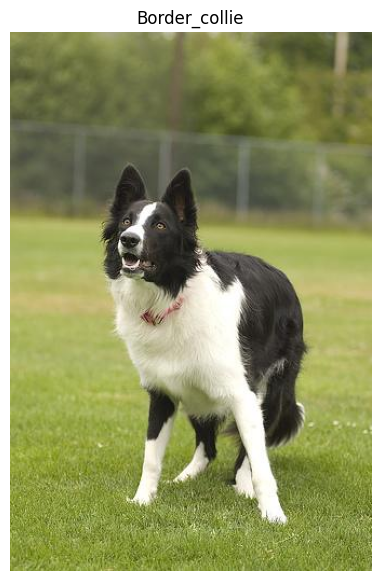

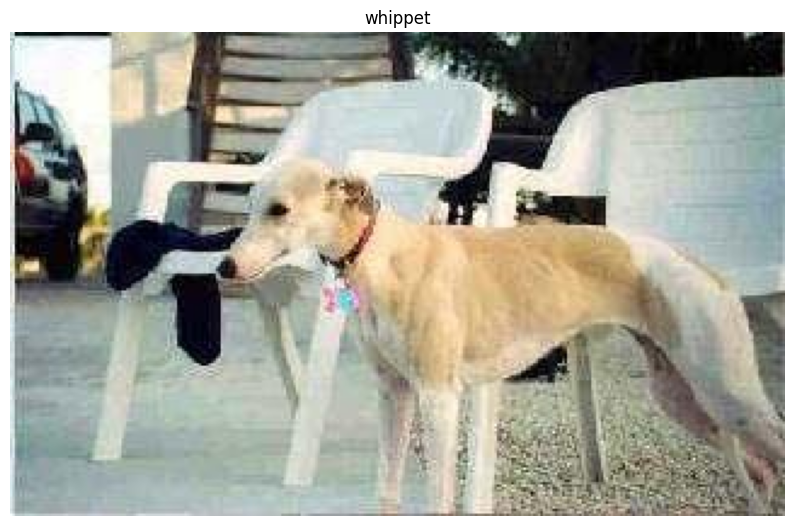

In [ ]:
import torch
# Create train and test folder in the image_path
train_dir = image_path / "train"
test_dir = image_path/ "test"

#Setup random seed
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

#Converting mat to folder with images
if not train_dir.is_dir() or not test_dir.is_dir() or not any(train_dir.iterdir()) or not any(test_dir.iterdir()):
  ##Train
  if not train_dir.is_dir() or not any(train_dir.iterdir()):
    train_dir.mkdir(parents=True,
                    exist_ok = True)

    ## train mat path
    TRAIN_MAT_NAME = "train_data.mat" ### Look at your walk through output to change this if neccesary
    train_mat_path = os.path.join(raw_data_path,TRAIN_MAT_NAME)

    #Cover train mat
    img_path_list = convert_mat(train_test= "train", mat_path = train_mat_path,out_dir = train_dir)
    print("Created train folder")

  ##Test
  if not test_dir.is_dir() or not any(test_dir.iterdir()):
    test_dir.mkdir(parents=True,
                    exist_ok = True)

    ## test mat path
    TEST_MAT_NAME = "test_data.mat" ### Look at your walk through output to change this if neccesary
    test_mat_path = os.path.join(raw_data_path,TEST_MAT_NAME)

    #Cover test mat
    convert_mat(train_test ="test", mat_path = test_mat_path,out_dir = test_dir)

    print("Created test folder")

else:
   print("Train and test folder are existed, >>>> Skipped converting")
   img_path_list = list(train_dir.glob("*/*.jpg"))



## 3.Data augumenting then load it into the DataLoaders

In [ ]:
import torchvision
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

### 3.1 Transforming data

In [ ]:
#Set up Heigth Width, please change if you like to
HEIGHT = 224
WIDTH = 224

#Random seed
torch.manual_seed(RANDOM_SEED)

#Data augumenting
## Simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size = (HEIGHT,WIDTH)),
    transforms.ToTensor()
])

img = Image.open(random.choice(img_path_list))
simple_transform(img).shape

torch.Size([3, 224, 224])

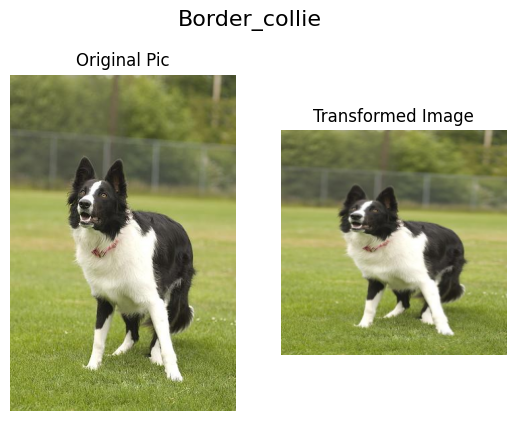

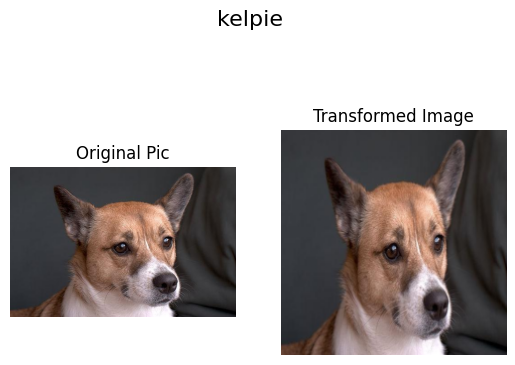

In [ ]:
# Visualize this transformed image

def plot_transformed_image(image_path,transform,n=3,seed=420):

    random.seed(seed)
    random_image_paths = random.sample(image_path,k=n)

    for image_path in random_image_paths:
      with Image.open(image_path) as img:

        fig,ax = plt.subplots(1,2)
        ax[0].imshow(img)
        ax[0].set_title(f"Original Pic")
        ax[0].axis("off")

        transformed_img = transform(img).permute(1,2,0)
        ax[1].imshow(transformed_img)
        ax[1].set_title("Transformed Image")
        ax[1].axis("off")

        fig.suptitle(f"{image_path.parent.stem}", fontsize=16)
plot_transformed_image(img_path_list,simple_transform,n=2)

### 3.2 Creating train_data, test_data

In [ ]:
train_data = datasets.ImageFolder(root = train_dir,
                                  transform= simple_transform,
                                  target_transform = None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = simple_transform,
                                 target_transform = None)

# Set class_name and class_to_idx
class_name = train_data.classes
class_to_idx = train_data.class_to_idx

#Set img sample and lable sample
image,lable = train_data[0]
image.shape

torch.Size([3, 224, 224])

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

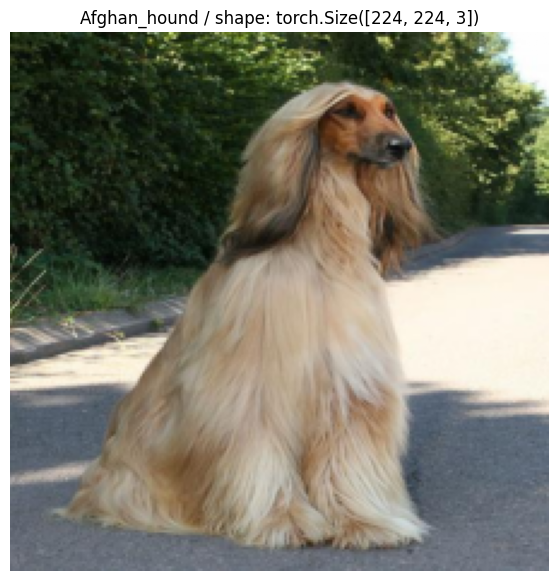

In [ ]:
#Plot the image
plt.figure(figsize =(10,7))
plt.imshow(image.permute(1,2,0))
plt.title(f"{class_name[lable]} / shape: {image.permute(1,2,0).shape}")
plt.axis(False)

### 3.3 Turn data to DataLoader

In [ ]:
from torch.utils.data import DataLoader

#Batch size setup (You might want to change it)
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset = test_data,
                             num_workers = os.cpu_count(),
                             batch_size = BATCH_SIZE,
                             shuffle =False)

img, lable = next(iter(train_dataloader))
img.shape

torch.Size([32, 3, 224, 224])

## 4.Funtion for training process

### 4.1 Train step method

In [ ]:
def train_step(model,data_loader, loss_fn, optimizer,accuracy_fn, device):
  """ This is a method to proceed your training
  Args:
  model || data_loader || loss_fn || optimizer || accuracy_fn
  || device: where you want your model on.

  Return: loss and accuracy
  """

  #Initalize the return
  accuracy = loss = 0
  #training process
  model.train()
  for batch, (X,y) in enumerate(data_loader):
    #send data into the targeted device
    X,y = X.to(device), y.to(device)

    y_logits = model(X).to(device)

    batch_loss = loss_fn(y_logits, y)
    loss += batch_loss.item()
    accuracy += accuracy_fn(y,torch.argmax(y_logits,dim=1))

    optimizer.zero_grad()

    batch_loss.backward()


    optimizer.step()


    if batch % 100 == 0:
      print(f"Looking at {batch * len(X)}/{len(data_loader)*len(X)} samples.")

  #Scale loss and accuracy to the average
  accuracy = accuracy / len(data_loader)
  loss = loss/len(data_loader)

  return loss, accuracy





### 4.2 Testing step method

In [ ]:
def test_step(model, data_loader ,loss_fn, accuracy_fn, device):
  """ This is a method to proceed your testing
  Args:
  model || data_loader || loss_fn || accuracy_fn
  || device: where you want your model on.

  Return: loss and accuracy
  """

  #Initalize the return
  loss = accuracy =0

  model.eval()
  with torch.inference_mode():
    for batch, (X,y) in enumerate(data_loader):
      X,y = X.to(device), y.to(device)
      #testing
      y_logits = model(X).to(device)

      loss += loss_fn(y_logits, y).item()
      accuracy += accuracy_fn(y,torch.argmax(y_logits,dim=1))

      if batch %100 == 0:
        print(f"Eval {batch*len(X)}/{len(data_loader) * len(X)} samples.")

  # Scale accuracy and loss to the average
  loss = loss / len(data_loader)
  accuracy = accuracy / len(data_loader)

  return loss, accuracy


### 4.3 Print time method

In [ ]:
# Print out the time method
def print_time(start, end):
  print(f"It takes {(end-start):.2f} s to train the model")

### 4.4 Training loop method

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
## Training Loop

def train( model, loss_fn, optimizer, accuracy_fn, train_dataloader, test_dataloader, device = device, epochs = 3):

  #Sending metric, model func to device
  model.to(device)
  accuracy_fn.to(device)

  # Return value
  results = {
      "train_loss":[],
      "train_acc":[],
      "test_loss":[],
      "test_acc":[]

  }
  #Timing
  start_time = timer()

  #Training
  for epoch in tqdm(range(epochs)):
    print("--------------------------")
    print(f"Epoch: {epoch}\n--------------")
    train_loss, train_acc = train_step(model = model, data_loader =train_dataloader,
                                      loss_fn = loss_fn,
                                      optimizer = optimizer,
                                      accuracy_fn = accuracy_fn,
                                      device = device)

    test_loss, test_acc = test_step(model = model, data_loader =test_dataloader,
                                      loss_fn = loss_fn,
                                      accuracy_fn = accuracy_fn,
                                      device = device)
    #Print out what happen
    print(f"Train Loss:{train_loss:.3f} || Train accuracy = {(train_acc*100):.2f} % || Test Loss:{test_loss:.3f} || Test accuracy = {(test_acc*100):.2f}%")

    #Restore values
    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

  #Printing time
  end_time = timer()
  print_time(start = start_time, end = end_time)

  #Return
  return results

## 5.Baseline Model (Model 0): None-linerity model not using augumented data on cpu

### 5.1 def the class and initialize te V0 model

In [ ]:
from torch import nn

# Class of V0 model
class Your_Dog_Breed_Model_V0(nn.Module):
  def __init__(self, input_shape,hidden_units = 10, output_shape = len(class_name)):
    super().__init__()
    self.linear_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.LeakyReLU(0.1),
        nn.Linear(in_features = hidden_units, out_features = output_shape ),
    )

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
## initialize it
torch.manual_seed(RANDOM_SEED)
model_0 = Your_Dog_Breed_Model_V0(input_shape = 3*224*224, hidden_units =8, output_shape = len(class_name))

### 5.2 setup accuracy_fn, loss_fn, optimizer for V0

In [ ]:
# Download torch metrics
try:
  from torchmetrics import Accuracy
  accuracy_fn = Accuracy(task ="multiclass", num_classes = len(class_name))
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy
  accuracy_fn = Accuracy(task ="multiclass", num_classes = len(class_name))




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 59.8 MB/s eta 0:00:00


In [ ]:
#Set up loss func, optimizer and accuracy_fn
loss_fn_V0 = nn.CrossEntropyLoss()

optimizer_V0 = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)



### 5.3 Train V0

In [ ]:
model_0_results =train(model = model_0, loss_fn = loss_fn_V0, optimizer = optimizer_V0, accuracy_fn = accuracy_fn,
      train_dataloader = train_dataloader, test_dataloader = test_dataloader,
      device = "cpu",epochs = 3)

  0%|          | 0/3 [00:00<?, ?it/s]

--------------------------
Epoch: 0
--------------
Looking at 0/12000 samples.
Looking at 3200/12000 samples.
Looking at 6400/12000 samples.
Looking at 9600/12000 samples.
Eval 0/8608 samples.
Eval 3200/8608 samples.
Eval 6400/8608 samples.
Train Loss:4.773 || Train accuracy = 1.67 % || Test Loss:4.792 || Test accuracy = 1.17%
--------------------------
Epoch: 1
--------------
Looking at 0/12000 samples.
Looking at 3200/12000 samples.
Looking at 6400/12000 samples.
Looking at 9600/12000 samples.
Eval 0/8608 samples.
Eval 3200/8608 samples.
Eval 6400/8608 samples.
Train Loss:4.751 || Train accuracy = 1.80 % || Test Loss:4.878 || Test accuracy = 0.93%
--------------------------
Epoch: 2
--------------
Looking at 0/12000 samples.
Looking at 3200/12000 samples.
Looking at 6400/12000 samples.
Looking at 9600/12000 samples.
Eval 0/8608 samples.
Eval 3200/8608 samples.
Eval 6400/8608 samples.
Train Loss:4.736 || Train accuracy = 1.83 % || Test Loss:4.785 || Test accuracy = 1.06%
It takes 53.0

In [ ]:
len(class_name)

120

## 6.CCN models with data augumented datasets (Model 1)

### 6.1 Create augmented data and put int the DataLoader

In [ ]:
import torchvision
from torch.utils.data import  DataLoader
from torchvision import datasets

## Data Augemting
##Train
train_transform = transforms.Compose([

    #Resize Image
    transforms.Resize(size=(HEIGHT,WIDTH)),
    #Augementing
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    #image to Tensor
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])

])
##Test
test_transform = transforms.Compose([
    transforms.Resize(size =(HEIGHT,WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load data in
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = train_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform = test_transform,
                                 target_transform = None)


# DataLoader
train_dataloader_augumented = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = os.cpu_count(),
                              shuffle = True)

test_dataloader_augumented = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = os.cpu_count(),
                             shuffle = False)

image,label = next(iter(train_dataloader_augumented))
image.shape

torch.Size([32, 3, 224, 224])

### 6.2 Make a class of V1 model and initializing

In [ ]:
class Your_Dog_Breed_Model_V1(nn.Module):
  def __init__(self,input_shape, hidden_units=10, output_shape = len(class_name)):
    super().__init__()

    self.cnn_block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = (3,3),
                  stride = 1,
                  padding = 1),
        nn.LeakyReLU(0.01),

        nn.Conv2d(in_channels = hidden_units,
                  out_channels =hidden_units,
                  kernel_size = (3,3),
                  stride = 1,
                  padding =1),
        nn.LeakyReLU(0.01),
        nn.MaxPool2d(kernel_size= (2,2))
    )

    self.cnn_block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = (3,3),
                  stride = 1,
                  padding =1),
        nn.LeakyReLU(0.01),

        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = (3,3),
                  stride = 1,
                  padding =1),
        nn.LeakyReLU(0.01),

        nn.MaxPool2d(kernel_size = (2,2))
    )

    self.linear_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*56*56,
                  out_features = output_shape),

    )


  def forward(self, x:torch.Tensor) -> torch.Tensor():
    x = self.cnn_block1(x)
    x = self.cnn_block2(x)
    return self.linear_layer(x)


In [ ]:
## initialize ModelV1
torch.manual_seed(RANDOM_SEED)
model_1 = Your_Dog_Breed_Model_V1(input_shape = 3,
                                  hidden_units = 10,
                                  output_shape = len(class_name))


### 6.3 Loss_fn, Accuracy_fn and Optimizer for V1

In [ ]:
import torch.optim.lr_scheduler as lr_scheduler

# Loss Function
loss_fn_V1 = nn.CrossEntropyLoss()

#Opttimizer x Regulization
optimizer_V1 = torch.optim.Adam(params = model_1.parameters(), lr = 0.0001, weight_decay=0.01)

# LR Scheduler
scheduler = lr_scheduler.LinearLR(optimizer_V1, start_factor=1.0, end_factor=0.01, total_iters=10)


### 6.4 Train the model_1 with epochs = 5

In [ ]:
model_1_results = train(model=model_1, loss_fn = loss_fn_V1, optimizer = optimizer_V1, accuracy_fn = accuracy_fn,
      train_dataloader = train_dataloader_augumented, test_dataloader =test_dataloader_augumented,
      device = device, epochs = 10)


  0%|          | 0/10 [00:00<?, ?it/s]

--------------------------
Epoch: 0
--------------
Looking at 0/12000 samples.
Looking at 3200/12000 samples.
Looking at 6400/12000 samples.
Looking at 9600/12000 samples.
Eval 0/8608 samples.
Eval 3200/8608 samples.
Eval 6400/8608 samples.
Train Loss:4.779 || Train accuracy = 1.42 % || Test Loss:4.696 || Test accuracy = 2.18%
--------------------------
Epoch: 1
--------------
Looking at 0/12000 samples.
Looking at 3200/12000 samples.
Looking at 6400/12000 samples.
Looking at 9600/12000 samples.
Eval 0/8608 samples.
Eval 3200/8608 samples.
Eval 6400/8608 samples.
Train Loss:4.663 || Train accuracy = 2.59 % || Test Loss:4.587 || Test accuracy = 3.31%
--------------------------
Epoch: 2
--------------
Looking at 0/12000 samples.
Looking at 3200/12000 samples.
Looking at 6400/12000 samples.
Looking at 9600/12000 samples.
Eval 0/8608 samples.
Eval 3200/8608 samples.
Eval 6400/8608 samples.
Train Loss:4.549 || Train accuracy = 3.88 % || Test Loss:4.493 || Test accuracy = 4.07%
-------------

### 6.5 Model 1 results


In [ ]:
print(model_1_results)

{'train_loss': [4.778788167317709, 4.66301224899292, 4.549097343444824, 4.451919658660889, 4.3769960009257, 4.30357465616862, 4.25025184694926, 4.162982873280843, 4.102071427663168, 3.9721312204996746], 'train_acc': [0.014166666194796562, 0.02591666579246521, 0.03883333131670952, 0.055166665464639664, 0.06716666370630264, 0.08308333158493042, 0.09216666221618652, 0.11091666668653488, 0.12449999898672104, 0.15408332645893097], 'test_loss': [4.696200677453364, 4.587019619888532, 4.493283284197953, 4.440171619330197, 4.39910491691646, 4.372198061428992, 4.390022142225925, 4.378810621105606, 4.396093252423085, 4.404724023599163], 'test_acc': [0.02184014767408371, 0.03310873731970787, 0.04065985232591629, 0.0458875447511673, 0.05425185710191727, 0.06098977476358414, 0.06296468526124954, 0.06656598299741745, 0.061570629477500916, 0.06261616945266724]}


## 7.Visualization and Evaluating model

###7.1 Prediction function

In [ ]:
def eval_model(model:torch.nn.Module,
            data_loader: torch.utils.data.DataLoader,
            loss_fn : nn.Module,
            accuracy_fn,
            device = device):

  #Set up
  model.to(device)
  model.eval()

  ## return value
  test_loss = test_accuracy = 0

  with torch.inference_mode():
    for batch,(X,y) in enumerate(data_loader):
      X,y = X.to(device), y.to(device)

      y_logits = model(X)
      loss = loss_fn(y_logits, y)
      test_loss += loss.item()
      test_accuracy += accuracy_fn(y,torch.argmax(y_logits,dim=1)).item()

    #Rescale return values
    test_loss /= len(data_loader)
    test_accuracy /= len(data_loader)

  return {"model" : model.__class__.__name__,
          "test_loss" : test_loss,
          "test_accuracy" : test_accuracy*100}

In [ ]:
eval_model(model_1, test_dataloader_augumented, loss_fn_V1, accuracy_fn, device)

{'model': 'Your_Dog_Breed_Model_V1',
 'test_loss': 4.404724023599163,
 'test_accuracy': 6.261617100371747}

### 7.2 Create loss curve


In [ ]:
from typing import Dict, List
def plot_loss_curve(results: Dict[str,List[float]]):
  ## Get losses
  train_loss = results["train_loss"]
  test_loss = results["test_loss"]
  ## get accuracy
  train_acc = results["train_acc"]
  test_acc = results["test_acc"]

  #Epoch
  epoch = range(len(train_loss))

  ## Ploting Losses
  plt.figure(figsize = (10,7))
  plt.subplot(1,2,1)
  plt.plot(epoch,train_loss, label ="train_loss")
  plt.plot(epoch, test_loss, label="test_loss")
  plt.title("Losses")
  plt.xlabel("Epoch")
  plt.legend()

  ## Ploting Accuracy
  plt.subplot(1,2,2)
  plt.plot(epoch,train_acc, label="Train accuracy")
  plt.plot(epoch,test_acc, label="Test accuracy")
  plt.title("Acuraccy")
  plt.xlabel("Epoch")
  plt.legend()

  plt.show()

### 7.4 Model 0 loss curve

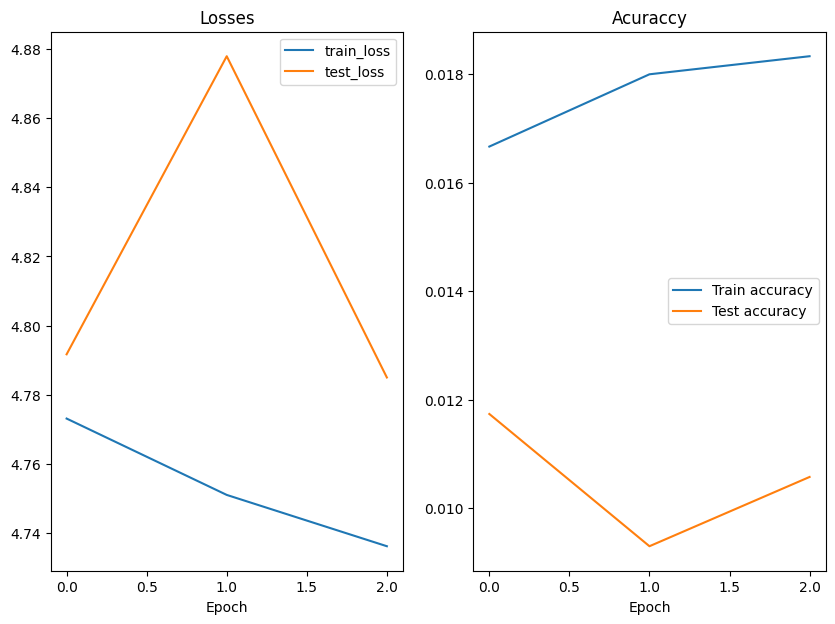

In [ ]:
plot_loss_curve(model_0_results)

### 7.3 Model 1 loss curve

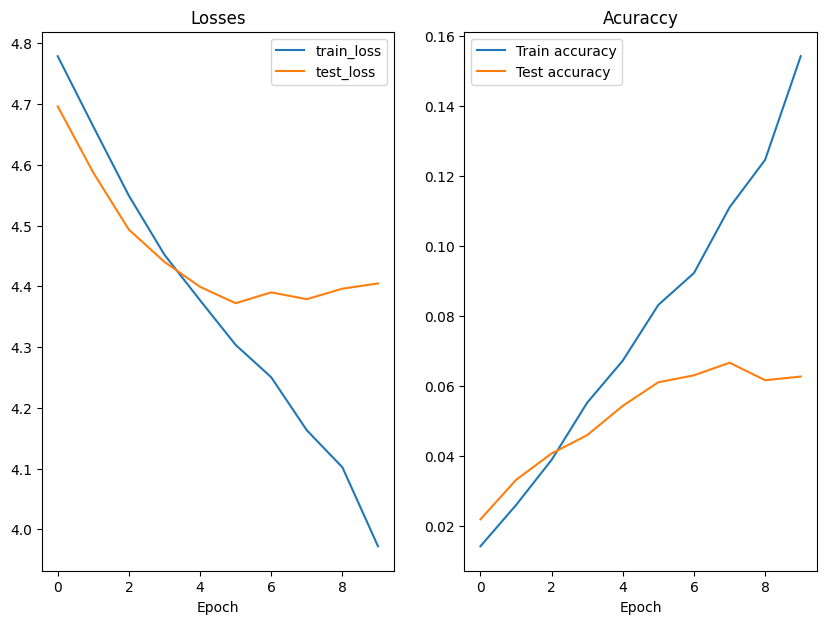

In [ ]:
plot_loss_curve(model_1_results)

## 8.Notes and plans
 - The current model facing with a very bad overfitting problem when it can potentially reach to over 80% accuracy in the train_datasets but can only reach 7% for test dataset.
 - To address this challenge, I would like implement Transfer learning and better data scaling process to reduce the overfitting in the next time!

 See youuu!